In [1]:
import numpy as np
import pandas as pd

In [2]:
# dataframe = pd.read_csv('data-files/credit.csv')
dataframe = pd.read_csv('data-files/credit2.csv')

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Loan Status           100000 non-null  int64
 1   Term                  100000 non-null  int64
 2   Credit Good           100000 non-null  int64
 3   Credit Very Good      100000 non-null  int64
 4   Home Mortgage         100000 non-null  int64
 5   Own Home              100000 non-null  int64
 6   Rent                  100000 non-null  int64
 7   Emp Level Mid         100000 non-null  int64
 8   Emp Senior            100000 non-null  int64
 9   No Credit Problem     100000 non-null  int64
 10  Some Credit promblem  100000 non-null  int64
 11  Good Credit Age       100000 non-null  int64
 12  Short Credit Age      100000 non-null  int64
 13  No Tax Lien           100000 non-null  int64
 14  Some Tax Liens        100000 non-null  int64
 15  No bankruptcies       100000 non-nu

In [8]:
dataframe.values # dataframe -> numpy array

array([[1, 0, 1, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
# 목적변수(label, target), 설명변수(features) 구분
y = dataframe['Loan Status']
X = dataframe.drop(['Loan Status'], axis=1)

In [10]:
y.value_counts() # 값의 종류별 빈도수 계산

1    77361
0    22639
Name: Loan Status, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33,
                                                    stratify=y, # 목적변수 분포 달라서(위의 결과) 
                                                    random_state=42)

In [15]:
X_train.shape, X_test.shape # train set, test set 분할

((67000, 20), (33000, 20))

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # 랜덤포레스트 분류기, 확률적 경사하강법
from sklearn.metrics import classification_report
# !pip install scikit-plot
from scikitplot.metrics import plot_confusion_matrix # pip install scikit-plot

In [25]:
knnclassifier = KNeighborsClassifier(n_neighbors = int(X.shape[1]/2)) # 이웃개수 = 컬럼의 1/2 (X.shape[1]은 컬럼 갯수)
knnclassifier.fit(X_train, y_train) # 훈련 (training)

KNeighborsClassifier(n_neighbors=10)

In [23]:
X.shape[1]

20

In [26]:
print("Score: ",knnclassifier.score(X_test, y_test)) # 분류 정확도 : 정답개수/전체개수

Score:  0.7493636363636363


In [27]:
prediction = knnclassifier.predict(X_test)

In [29]:
y_test.values[:10], prediction[:10]

(array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0], dtype=int64),
 array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64))

In [28]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.31      0.09      0.14      7471
           1       0.78      0.94      0.85     25529

    accuracy                           0.75     33000
   macro avg       0.55      0.52      0.50     33000
weighted avg       0.67      0.75      0.69     33000



(2.0, -1.0)

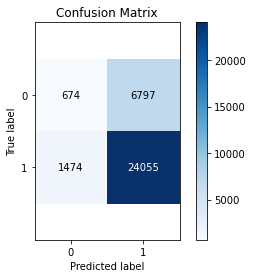

In [30]:
ax = plot_confusion_matrix(y_test, prediction)
ylim = ax.get_ylim()
ax.set_ylim(ylim[0] + 0.5, ylim[1] - 0.5)

In [31]:
lregclassifier = LogisticRegression(solver="liblinear")
lregclassifier.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [32]:
print("Score: ",lregclassifier.score(X_test, y_test))

Score:  0.7737272727272727


In [33]:
lregprediction = lregclassifier.predict(X_test)

In [34]:
print(classification_report(y_test, lregprediction))

              precision    recall  f1-score   support

           0       0.83      0.00      0.00      7471
           1       0.77      1.00      0.87     25529

    accuracy                           0.77     33000
   macro avg       0.80      0.50      0.44     33000
weighted avg       0.79      0.77      0.68     33000



(2.0, -1.0)

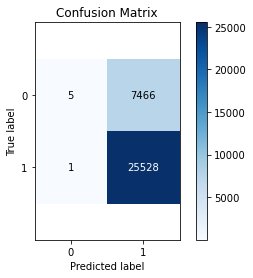

In [35]:
ax = plot_confusion_matrix(y_test, lregprediction)
ylim = ax.get_ylim()
ax.set_ylim(ylim[0] + 0.5, ylim[1] - 0.5)

In [36]:
clf = SVC(gamma='auto', kernel ='linear')
# clf = SVC(gamma='auto', kernel ='rbf')
clf.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [37]:
print("Accuracy Score: ", clf.score(X_test, y_test))

Accuracy Score:  0.7736060606060606


In [38]:
pred = clf.predict(X_test)

In [25]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7534
           1       0.77      1.00      0.87     25466

    accuracy                           0.77     33000
   macro avg       0.39      0.50      0.44     33000
weighted avg       0.60      0.77      0.67     33000



/home/hadoopdev/anaconda3/envs/instructor/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


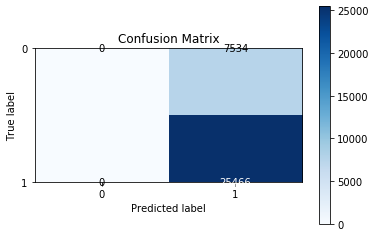

In [26]:
plot_confusion_matrix(y_test, pred)

In [27]:
XGBclf = GradientBoostingClassifier()
XGBclf.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [28]:
print("Accuracy Score: ", XGBclf.score(X_test, y_test))

Accuracy Score:  0.7717272727272727


In [29]:
XGBpred = XGBclf.predict(X_test)

In [30]:
print(classification_report(y_test, XGBpred))

              precision    recall  f1-score   support

           0       0.67      0.00      0.00      7534
           1       0.77      1.00      0.87     25466

    accuracy                           0.77     33000
   macro avg       0.72      0.50      0.44     33000
weighted avg       0.75      0.77      0.67     33000



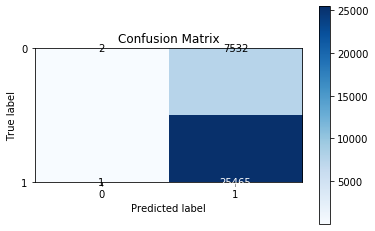

In [31]:
plot_confusion_matrix(y_test, XGBpred)

In [32]:
SGDclf = SGDClassifier(loss='modified_huber',shuffle=True)
SGDclf.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [33]:
SGDpred = SGDclf.predict(X_test)

In [34]:
print("Accuracy Score: ", SGDclf.score(X_test, y_test))

Accuracy Score:  0.7488484848484849


In [35]:
print(classification_report(y_test, SGDpred))

              precision    recall  f1-score   support

           0       0.33      0.09      0.15      7534
           1       0.78      0.94      0.85     25466

    accuracy                           0.75     33000
   macro avg       0.55      0.52      0.50     33000
weighted avg       0.68      0.75      0.69     33000



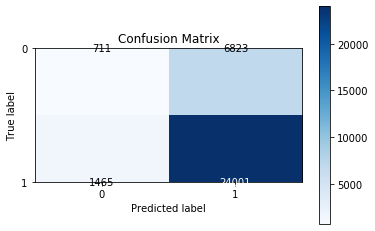

In [36]:
plot_confusion_matrix(y_test, SGDpred)

In [37]:
treec = DecisionTreeClassifier()

In [38]:
treec.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [39]:
print("Accuracy Score: ", treec.score(X_test, y_test))

Accuracy Score:  0.765


In [40]:
treec_pred = treec.predict(X_test)

In [41]:
print(classification_report(y_test, treec_pred))

              precision    recall  f1-score   support

           0       0.32      0.03      0.05      7534
           1       0.77      0.98      0.87     25466

    accuracy                           0.77     33000
   macro avg       0.55      0.50      0.46     33000
weighted avg       0.67      0.77      0.68     33000



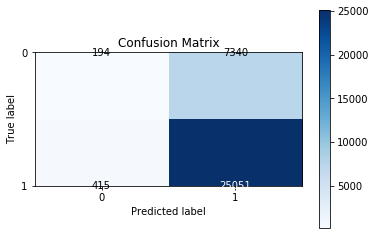

In [42]:
plot_confusion_matrix(y_test, treec_pred)

In [43]:
rfc = RandomForestClassifier(n_estimators=100)

In [44]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
print("Accuracy Score: ", rfc.score(X_test, y_test))

Accuracy Score:  0.7682121212121212


In [46]:
rfc_pred = rfc.predict(X_test)

In [47]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.36      0.02      0.04      7534
           1       0.77      0.99      0.87     25466

    accuracy                           0.77     33000
   macro avg       0.57      0.50      0.45     33000
weighted avg       0.68      0.77      0.68     33000



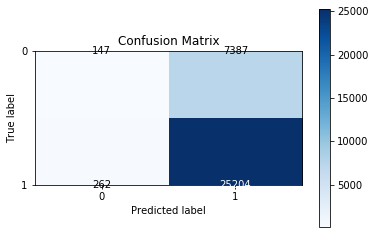

In [48]:
plot_confusion_matrix(y_test, rfc_pred)